In [46]:
# import libraries
import numpy as np
import pandas as pd
import sys
import csv

In [47]:
csv.field_size_limit(1000000000)
df = pd.read_csv("./data/state-of-the-union.csv", names=["year", "speech"], header=None)
df.head()

,year,speech
0,1790,"George Washington\nJanuary 8, 1790\n\nFellow-C..."
1,1790,\nState of the Union Address\nGeorge Washingto...
2,1791,\nState of the Union Address\nGeorge Washingto...
3,1792,\nState of the Union Address\nGeorge Washingto...
4,1793,\nState of the Union Address\nGeorge Washingto...


In [48]:
df.shape

(226, 2)

In [49]:
# check for duplicate rows
df.duplicated().sum()

0

In [50]:
# check for missing values
df.isnull().sum()

year      0
speech    0
dtype: int64

In [51]:
# read stop words
custom_stopwords = pd.read_csv("./data/stopwords-en.csv", header=None)

custom_stopwords.shape

# convert to a set of unique words
custom_stopwords = set(custom_stopwords[0])

In [52]:
# Stop words
STOP_WORDS = set(
    """
a about above across after afterwards again against all almost alone along
already also although always am among amongst amount an and another any anyhow
anyone anything anyway anywhere are around as at

back be became because become becomes becoming been before beforehand behind
being below beside besides between beyond both bottom but by

call can cannot ca could

did do does doing done down due during

each eight either eleven else elsewhere empty enough even ever every
everyone everything everywhere except

few fifteen fifty first five for former formerly forty four from front full
further

get give go

had has have he hence her here hereafter hereby herein hereupon hers herself
him himself his how however hundred

i if in indeed into is it its itself

keep

last latter latterly least less

just

made make many may me meanwhile might mine more moreover most mostly move much
must my myself

name namely neither never nevertheless next nine no nobody none noone nor not
nothing now nowhere

of off often on once one only onto or other others otherwise our ours ourselves
out over own

part per perhaps please put

quite

rather re really regarding

same say see seem seemed seeming seems serious several she should show side
since six sixty so some somehow someone something sometime sometimes somewhere
still such

take ten than that the their them themselves then thence there thereafter
thereby therefore therein thereupon these they third this those though three
through throughout thru thus to together too top toward towards twelve twenty
two

under until up unless upon us used using

various very very via was we well were what whatever when whence whenever where
whereafter whereas whereby wherein whereupon wherever whether which while
whither who whoever whole whom whose why will with within without would

yet you your yours yourself yourselves
""".split()
)

contractions = ["n't", "'d", "'ll", "'m", "'re", "'s", "'ve"]
STOP_WORDS.update(contractions)

for apostrophe in ["‘", "’"]:
    for stopword in contractions:
        STOP_WORDS.add(stopword.replace("'", apostrophe))

In [53]:
us_presidents_stopwords = {
    "george",
    "washington",
    "john",
    "adams",
    "thomas",
    "jefferson",
    "james",
    "madison",
    "monroe",
    "quincy",
    "jackson",
    "martin",
    "van",
    "buren",
    "william",
    "henry",
    "harrison",
    "tyler",
    "knox",
    "polk",
    "zachary",
    "taylor",
    "millard",
    "fillmore",
    "franklin",
    "pierce",
    "buchanan",
    "abraham",
    "lincoln",
    "andrew",
    "johnson",
    "ulysses",
    "grant",
    "rutherford",
    "hayes",
    "garfield",
    "chester",
    "arthur",
    "grover",
    "cleveland",
    "benjamin",
    "mcKinley",
    "theodore",
    "roosevelt",
    "taft",
    "woodrow",
    "wilson",
    "warren",
    "harding",
    "calvin",
    "coolidge",
    "herbert",
    "hoover",
    "truman",
    "eisenhower",
    "kennedy",
    "lyndon",
    "nixon",
    "gerald",
    "ford",
    "jimmy",
    "carter",
    "ronald",
    "reagan",
    "bill",
    "clinton",
    "obama",
    "donald",
    "trump",
    "joe",
    "biden",
}


# other stopwords for this specific dataset
other_stopwords = {
    "state",
    "union",
    "mr",
    "speaker",
    "vice",
    "members",
    "senate",
    "house",
    "representatives",
    "fellow",
    "citizens",
    "united",
    "states",
    "america",
    "american",
    "americans",
    "congress",
    "congressmen",
    "congresswomen",
    "congressman",
    "congresswoman",
    "president",
    "address",
    "tonight",
    "today",
}

months = {
    "january",
    "february",
    "march",
    "april",
    "may",
    "june",
    "july",
    "august",
    "september",
    "october",
    "november",
    "december",
}

In [54]:
import nltk

nltk.download("stopwords")

# import stopwords from nltk
from nltk.corpus import stopwords

# nltk stopwords as set
nltk_stopwords = set(stopwords.words("english"))

# spacy stopwords as set
spacy_stopwords = STOP_WORDS

# combine spacy and custom stopwords
all_stopwords = spacy_stopwords.union(custom_stopwords)

# add nltk stopwords
all_stopwords = all_stopwords.union(nltk_stopwords)

# UPDATE STOPWORDS
# add US presidents stopwords
all_stopwords = all_stopwords.union(us_presidents_stopwords)
# add other stopwords
all_stopwords = all_stopwords.union(other_stopwords)
# add months
all_stopwords = all_stopwords.union(months)

# # shape of the combined stopwords
len(all_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajult\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


521

In [55]:
from gensim.parsing.preprocessing import (
    preprocess_string,
    strip_tags,
    strip_punctuation,
    strip_numeric,
    remove_stopwords,
)


# custom function to remove stopwords using the custom stop words
def remove_stopwords_custom(text):
    return remove_stopwords(text, stopwords=all_stopwords)


# base function to clean the speech using gensim package
def preprocess_text(text):
    filters = [
        strip_tags,
        strip_punctuation,
        strip_numeric,
        remove_stopwords_custom,
        # stem_text,
    ]
    text = preprocess_string(text, filters)
    return text

In [56]:
# convert to lowercase
df["speech"] = df["speech"].str.lower()

# apply the function to the speech column
df["clean_speech"] = df["speech"].apply(preprocess_text)

In [57]:
df.head()

,year,speech,clean_speech
0,1790,"george washington\njanuary 8, 1790\n\nfellow-c...","[embrace, great, satisfaction, opportunity, pr..."
1,1790,\nstate of the union address\ngeorge washingto...,"[meeting, feel, satisfaction, able, repeat, co..."
2,1791,\nstate of the union address\ngeorge washingto...,"[vain, expect, peace, indians, frontiers, long..."
3,1792,\nstate of the union address\ngeorge washingto...,"[abatement, satisfaction, meet, present, occas..."
4,1793,\nstate of the union address\ngeorge washingto...,"[commencement, term, called, office, fit, occa..."


In [58]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


# Function to lemmatize words
def lemmatize_list(word_list):
    return [lemmatizer.lemmatize(word, pos="v") for word in word_list]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajult\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Apply the lemmatize function to the clean_speech column
df["lemmatized_speech"] = df["clean_speech"].apply(lemmatize_list)

In [60]:
df.head()

,year,speech,clean_speech,lemmatized_speech
0,1790,"george washington\njanuary 8, 1790\n\nfellow-c...","[embrace, great, satisfaction, opportunity, pr...","[embrace, great, satisfaction, opportunity, pr..."
1,1790,\nstate of the union address\ngeorge washingto...,"[meeting, feel, satisfaction, able, repeat, co...","[meet, feel, satisfaction, able, repeat, congr..."
2,1791,\nstate of the union address\ngeorge washingto...,"[vain, expect, peace, indians, frontiers, long...","[vain, expect, peace, indians, frontiers, long..."
3,1792,\nstate of the union address\ngeorge washingto...,"[abatement, satisfaction, meet, present, occas...","[abatement, satisfaction, meet, present, occas..."
4,1793,\nstate of the union address\ngeorge washingto...,"[commencement, term, called, office, fit, occa...","[commencement, term, call, office, fit, occasi..."


In [61]:
# saved the lemmatized speech to a different df
df_lemmatized = df[["year", "lemmatized_speech"]].copy()

df_lemmatized.head()

,year,lemmatized_speech
0,1790,"[embrace, great, satisfaction, opportunity, pr..."
1,1790,"[meet, feel, satisfaction, able, repeat, congr..."
2,1791,"[vain, expect, peace, indians, frontiers, long..."
3,1792,"[abatement, satisfaction, meet, present, occas..."
4,1793,"[commencement, term, call, office, fit, occasi..."


In [62]:
# function to get word frequency

from collections import defaultdict


def get_word_freq(df):
    word_freq = defaultdict(int)
    for index, row in df.iterrows():
        for word in row["lemmatized_speech"]:
            word_freq[word] += 1
    return word_freq


word_freq = get_word_freq(df_lemmatized)

word_freq

defaultdict(int,
            {'embrace': 95,
             'great': 2031,
             'satisfaction': 192,
             'opportunity': 386,
             'present': 1314,
             'congratulate': 53,
             'favorable': 175,
             'prospect': 111,
             'public': 1596,
             'affairs': 325,
             'recent': 240,
             'accession': 19,
             'important': 639,
             'north': 203,
             'carolina': 24,
             'constitution': 502,
             'official': 127,
             'information': 266,
             'receive': 636,
             'rise': 226,
             'credit': 289,
             'respectability': 4,
             'country': 1972,
             'general': 807,
             'increase': 1310,
             'good': 899,
             'government': 4247,
             'concord': 9,
             'peace': 1385,
             'plenty': 24,
             'bless': 100,
             'circumstances': 243,
             'auspicious':

In [63]:
word_freq["s"]

0

In [64]:
# function to filter out words from df that have a frequency less than a certain threshold
threshold = 15
df_lemmatized["lemmatized_speech_filtered"] = df_lemmatized["lemmatized_speech"].apply(
    lambda x: [word for word in x if word_freq[word] >= threshold]
)

In [65]:
df_lemmatized.head()

,year,lemmatized_speech,lemmatized_speech_filtered
0,1790,"[embrace, great, satisfaction, opportunity, pr...","[embrace, great, satisfaction, opportunity, pr..."
1,1790,"[meet, feel, satisfaction, able, repeat, congr...","[meet, feel, satisfaction, able, repeat, favor..."
2,1791,"[vain, expect, peace, indians, frontiers, long...","[vain, expect, peace, indians, frontiers, long..."
3,1792,"[abatement, satisfaction, meet, present, occas...","[satisfaction, meet, present, occasion, contin..."
4,1793,"[commencement, term, call, office, fit, occasi...","[commencement, term, call, office, fit, occasi..."


In [66]:
# creating a dictionary of words
from gensim.corpora import Dictionary

dictionary = Dictionary(df_lemmatized["lemmatized_speech_filtered"])
print("Number of unique words in the dictionary:", len(dictionary))

Number of unique words in the dictionary: 3698


In [67]:
# creating a corpus of words from the lemmatised speech
corpus = [
    dictionary.doc2bow(doc) for doc in df_lemmatized["lemmatized_speech_filtered"]
]

In [68]:
from gensim import models

# create a tfidf model
tfidf = models.TfidfModel(corpus)

In [69]:
# apply the tfidf model to the corpus
corpus_tfidf = tfidf[corpus]

corpus_tfidf[0]

[(0, 0.023493553656885782),
 (1, 0.10546647048254386),
 (2, 0.03009940394633673),
 (3, 0.020107526657857318),
 (4, 0.025130833909801177),
 (5, 0.017532177841233145),
 (6, 0.03575876592925789),
 (7, 0.020107526657857318),
 (8, 0.06958058553699342),
 (9, 0.05856300437069292),
 (10, 0.04377190382389711),
 (11, 0.03163780531950193),
 (12, 0.03891326288076146),
 (13, 0.013071348263610031),
 (14, 0.030861347592039855),
 (15, 0.03532740954219943),
 (16, 0.11966442596900363),
 (17, 0.10546647048254386),
 (18, 0.01563589183214195),
 (19, 0.059892423956193624),
 (20, 0.04496327759666201),
 (21, 0.043890510468833646),
 (22, 0.030744108059143464),
 (23, 0.010893588976261736),
 (24, 0.03009940394633673),
 (25, 0.027186536618711527),
 (26, 0.02447958983814592),
 (27, 0.01643780880606862),
 (28, 0.04836214529454901),
 (29, 0.101592936813429),
 (30, 0.02479807452565997),
 (31, 0.10313653359436188),
 (32, 0.020107526657857318),
 (33, 0.10546647048254386),
 (34, 0.012089064631735006),
 (35, 0.0175321778

In [76]:
texts = df_lemmatized["lemmatized_speech_filtered"].tolist()

texts[0]

len(texts)

226

# LSI Modelling


In [74]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)
corpus_lsi = lsi_model[corpus_tfidf]

lsi_model.print_topics(num_topics=10, num_words=8)

[(0,
  '-0.114*"program" + -0.087*"help" + -0.082*"job" + -0.080*"economic" + -0.075*"budget" + -0.063*"treaty" + -0.059*"let" + -0.058*"tax"'),
 (1,
  '-0.173*"program" + -0.157*"job" + -0.147*"help" + -0.124*"budget" + -0.102*"economic" + -0.099*"spend" + -0.096*"billion" + -0.094*"school"'),
 (2,
  '0.148*"job" + -0.127*"interstate" + 0.125*"iraq" + -0.111*"economic" + 0.105*"school" + -0.104*"farm" + 0.104*"terrorists" + -0.101*"industrial"'),
 (3,
  '0.155*"silver" + -0.136*"program" + -0.125*"militia" + 0.104*"gold" + -0.092*"economic" + 0.087*"iraq" + 0.086*"circulation" + 0.083*"arbitration"'),
 (4,
  '-0.268*"interstate" + -0.211*"corporations" + -0.154*"railroad" + 0.143*"program" + 0.139*"mexico" + 0.126*"soviet" + -0.094*"combinations" + 0.094*"communist"'),
 (5,
  '0.235*"terrorists" + 0.227*"iraq" + 0.180*"fight" + 0.164*"terror" + 0.160*"enemy" + 0.137*"iraqi" + 0.136*"al" + 0.136*"terrorist"'),
 (6,
  '-0.336*"mexico" + -0.290*"texas" + 0.170*"silver" + -0.161*"mexican"

In [86]:
# function to check the coherence measure of the LSI model
from gensim.models.coherencemodel import CoherenceModel


def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LsiModel(corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [87]:
limit = 31
start = 5
step = 1
x = range(start, limit, step)

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus_tfidf,
    texts=texts,
    start=start,
    limit=limit,
    step=step,
)

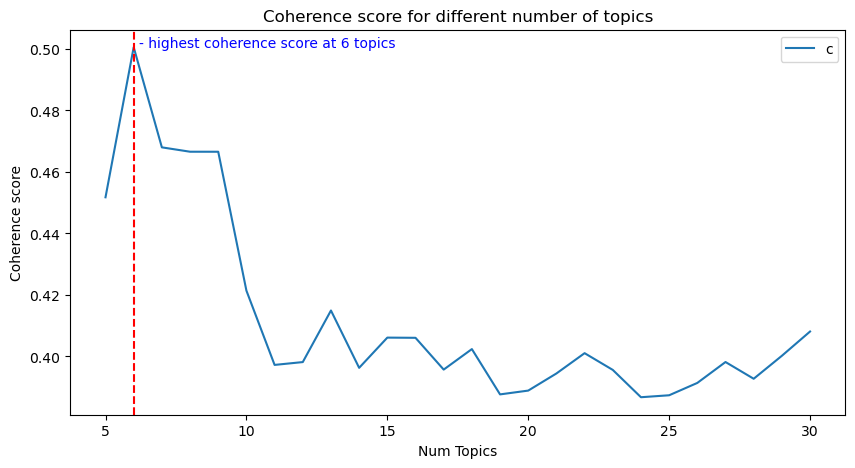

In [95]:
import matplotlib.pyplot as plt


# best number of topics
coherence_values_max = max(coherence_values)

best_num_topics = coherence_values.index(coherence_values_max) + start


plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.title("Coherence score for different number of topics")
plt.axvline(x=best_num_topics, color="r", linestyle="--")
# text showing the best number of topics
plt.text(
    best_num_topics + 0.2,
    coherence_values_max,
    f"- highest coherence score at {best_num_topics} topics",
    color="b",
)
plt.show()

In [ ]:
# creating the LSI model with the best number of topics
lsi_model_best = models.LsiModel(
    corpus_tfidf, id2word=dictionary, num_topics=best_num_topics
)
corpus_lsi_best = lsi_model_best[corpus_tfidf]

# print the best number of topics
print(
    f"Coherence score was highest at {coherence_values_max} for {best_num_topics} topics"
)

Coherence score was highest at 0.5005631876201838 for 6 topics


[(0,
  '-0.114*"program" + -0.087*"help" + -0.082*"job" + -0.080*"economic" + -0.075*"budget"'),
 (1,
  '0.173*"program" + 0.157*"job" + 0.147*"help" + 0.124*"budget" + 0.102*"economic"'),
 (2,
  '-0.148*"job" + 0.127*"interstate" + -0.125*"iraq" + 0.111*"economic" + -0.105*"school"'),
 (3,
  '-0.155*"silver" + 0.137*"program" + 0.125*"militia" + -0.104*"gold" + 0.091*"economic"'),
 (4,
  '-0.269*"interstate" + -0.210*"corporations" + -0.155*"railroad" + 0.144*"program" + 0.139*"mexico"'),
 (5,
  '0.236*"terrorists" + 0.227*"iraq" + 0.179*"fight" + 0.163*"terror" + 0.160*"enemy"')]

In [99]:
# get all the topics from the LSI model
topics = lsi_model_best.show_topics(formatted=False, num_words=5)

dict(topics)

{0: [('program', -0.114012139555661),
  ('help', -0.08666882245456613),
  ('job', -0.08159723278483354),
  ('economic', -0.0795411920627895),
  ('budget', -0.0748337508685434)],
 1: [('program', 0.1733518859871139),
  ('job', 0.15705570545669936),
  ('help', 0.14697657318192672),
  ('budget', 0.12352287117774634),
  ('economic', 0.10225624214840823)],
 2: [('job', -0.1480126115117197),
  ('interstate', 0.12708806140199116),
  ('iraq', -0.12463021705197057),
  ('economic', 0.11126480222523252),
  ('school', -0.10525357794991398)],
 3: [('silver', -0.15513226012375053),
  ('program', 0.13697990398226506),
  ('militia', 0.12473270828149195),
  ('gold', -0.10399828420977635),
  ('economic', 0.09130485936342837)],
 4: [('interstate', -0.2685609260145757),
  ('corporations', -0.21042348265687508),
  ('railroad', -0.15455422746200345),
  ('program', 0.14394871395062758),
  ('mexico', 0.13903905925366342)],
 5: [('terrorists', 0.23593941125653956),
  ('iraq', 0.22682076428649323),
  ('fight', 

In [100]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_topic_network(topic_data):
    G = nx.Graph()

    # Add edges between topics and words
    for topic, words in topic_data.items():
        topic_node = f"Topic {topic}"
        G.add_node(topic_node, color="red", size=1000)  # Topic nodes in red

        for word, weight in words:
            G.add_node(word, color="blue", size=500)  # Word nodes in blue
            G.add_edge(topic_node, word, weight=abs(weight))

    # Get node colors and sizes
    node_colors = [G.nodes[node]["color"] for node in G.nodes]
    node_sizes = [G.nodes[node]["size"] for node in G.nodes]

    # Get edge weights for visualization
    edge_weights = [G[u][v]["weight"] * 5 for u, v in G.edges]  # Scale for visibility

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color="gray",
        width=edge_weights,
        font_size=10,
        font_weight="bold",
    )
    plt.title("Topic-Word Network Graph")
    plt.show()

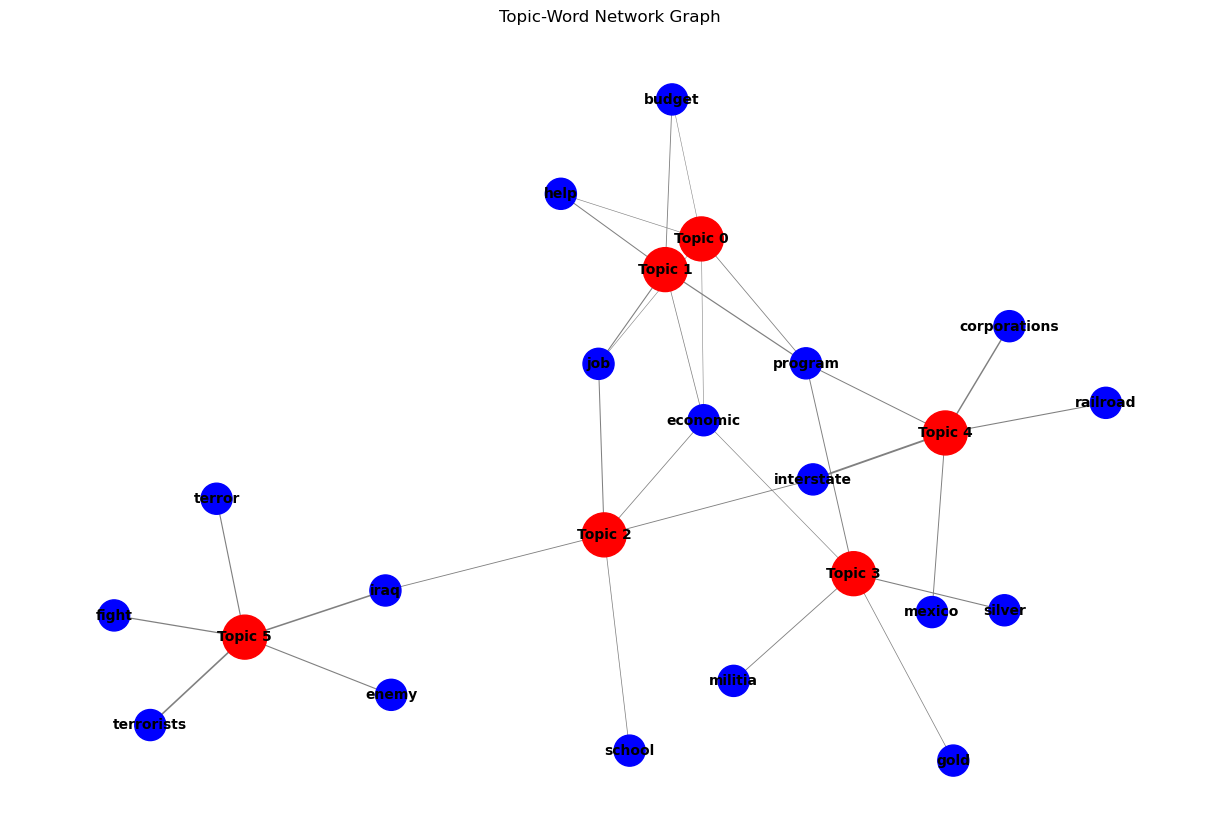

In [101]:
# plot the topic network
plot_topic_network(dict(topics))